In [95]:
import numpy as np
import pandas as pd
import math
import os
import sys
import glob
import time
import pickle
import time
import altair as alt
alt.data_transformers.disable_max_rows()

from astropy import units as u
from astropy.timeseries import LombScargle

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('figure', facecolor='w')
rc('xtick', labelsize=20)
rc('ytick', labelsize=20)

import multiprocessing as mp
from multiprocessing import Pool
print("Number of processors: ", mp.cpu_count())

sys.path.append('/astro/users/jbirky/projects/tess_binaries')
os.environ['TESS_DATA'] = '/data/epyc/projects2/tess'

import tess_binaries as tb

Number of processors:  96


In [96]:
tess_xm = pd.read_csv(tb.cat_dir + '/asassn_tess_xm.csv.gz')
psamp = tess_xm[~np.isnan(tess_xm['period'])]
ref = psamp[psamp['period'] < 28]

pos_ref = ref[ref['Type'].isin(['EA', 'EB', 'EW'])]
neg_ref = ref[~ref['Type'].isin(['EA', 'EB', 'EW'])]
print(len(pos_ref), len(neg_ref))

656 750


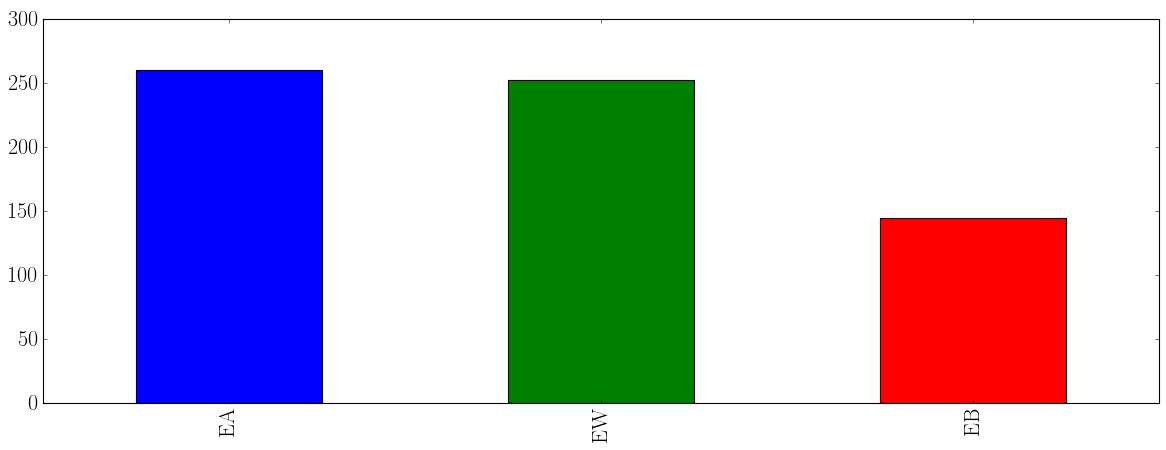

In [97]:
pos_ref['Type'].value_counts().plot(kind='bar', figsize=[18,6])

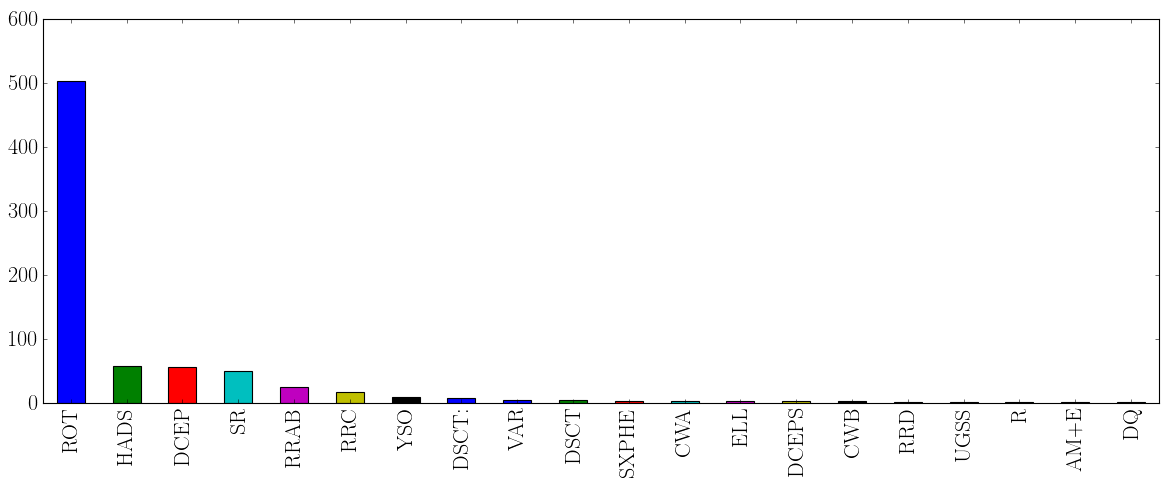

In [98]:
neg_ref['Type'].value_counts().plot(kind='bar', figsize=[18,6])

In [3]:
# Hold out reference data
pos_train = pos_ref[0:300]
neg_train = neg_ref[0:300]

pos_test = pos_ref[300:]
neg_test = neg_ref[300:]

In [99]:
def plotLightCurve(data, **kwargs):

    label = str(kwargs.get('label', 'Data'))
    
    plt.figure(figsize=[16,8])
    plt.ticklabel_format(useOffset=False)
    plt.scatter(data.time.jd, data['pdcsap_flux']/np.nanmedian(data['pdcsap_flux']), \
             color='k', s=2, label=f'{label}'.replace('_', ' '))

    plt.ylabel('PDCSAP Flux', fontsize=18)
    plt.xlabel('Julian Date', fontsize=18)
    plt.xlim(min(data.time.jd), max(data.time.jd))
    plt.legend(loc='upper right', frameon=False, fontsize=16)
    plt.minorticks_on()
    
    if 'save_dir' in kwargs:
        save_dir = kwargs.get('save_dir')
        tic_id = kwargs.get('tic_id')
        plt.savefig(f'{save_dir}/TIC_{tic_id}.png')
    plt.show() 

In [155]:
np.where(np.array(ref['Type']) == 'EA')

(array([   0,    3,    5,    7,    8,   16,   18,   19,   23,   24,   27,
          30,   33,   35,   36,   41,   42,   49,   50,   51,   65,   71,
          81,   83,   92,  100,  103,  104,  106,  114,  128,  129,  143,
         146,  152,  153,  154,  156,  159,  179,  182,  194,  195,  197,
         203,  223,  228,  232,  233,  246,  251,  268,  270,  273,  275,
         276,  280,  285,  287,  288,  289,  301,  319,  324,  331,  335,
         339,  342,  347,  353,  362,  371,  372,  375,  377,  378,  381,
         382,  383,  389,  390,  398,  402,  407,  410,  411,  412,  415,
         422,  426,  428,  430,  433,  434,  437,  438,  440,  451,  455,
         468,  501,  509,  511,  516,  540,  542,  543,  544,  546,  568,
         572,  583,  586,  590,  599,  600,  604,  610,  616,  619,  620,
         629,  639,  647,  657,  659,  663,  665,  667,  681,  688,  694,
         703,  727,  731,  736,  749,  778,  783,  791,  795,  804,  840,
         896,  940,  958, 1001, 1014, 

In [94]:
min(data.time.jd), max(data.time.jd)

(-0.3211126145260997, 0.3211058382385759)

In [109]:
data.time.jd

array([0.        , 0.00138892, 0.00277784, ..., 0.26300757, 0.26439646,
       0.26578534])

In [112]:
np.where((data.time.jd > .05) & (data.time.jd < .1))[0]

array([   36,    37,    38, ..., 19138, 19139, 19140])

In [117]:
tsteps = 5
tbins = np.linspace(min(data.time.jd), max(data.time.jd), tsteps+1)
for i in range(tsteps):
    bin_ind = np.where((data.time.jd > tbins[i]) & (data.time.jd < tbins[i+1]))[0]
    print(np.nanmedian(data['pdcsap_flux'][bin_ind]))

5092.125 electron / s
4528.259765625 electron / s
8418.5625 electron / s
6908.0537109375 electron / s
5784.1611328125 electron / s


In [163]:
print(f"{typ}: TIC_{tic_id}\nP={per}")
print(f'Bins: {tsteps}')

RRAB: TIC_425863844
P=0.5964037
Bins: 100


5 EA


/astro/users/jbirky/.local/lib/python3.6/site-packages/astropy/timeseries/io/kepler.py:77: UserWarning: Ignoring 815 rows with NaN times
  warnings.warn('Ignoring {0} rows with NaN times'.format(np.sum(nans)))


Stacking 1 light curve(s).


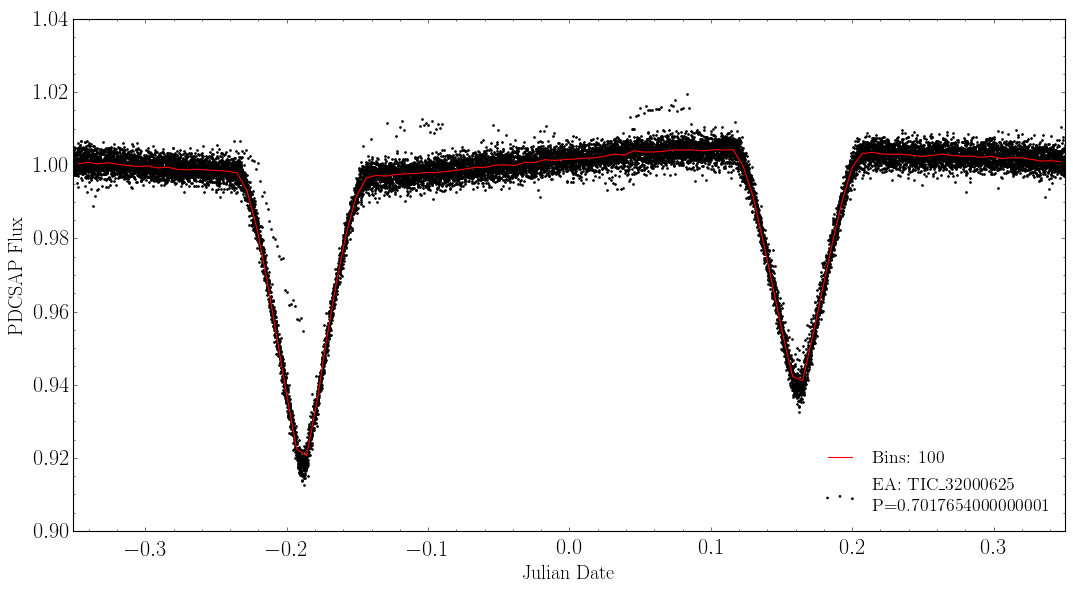

16 EA


/astro/users/jbirky/.local/lib/python3.6/site-packages/astropy/timeseries/io/kepler.py:77: UserWarning: Ignoring 815 rows with NaN times
  warnings.warn('Ignoring {0} rows with NaN times'.format(np.sum(nans)))


Stacking 1 light curve(s).


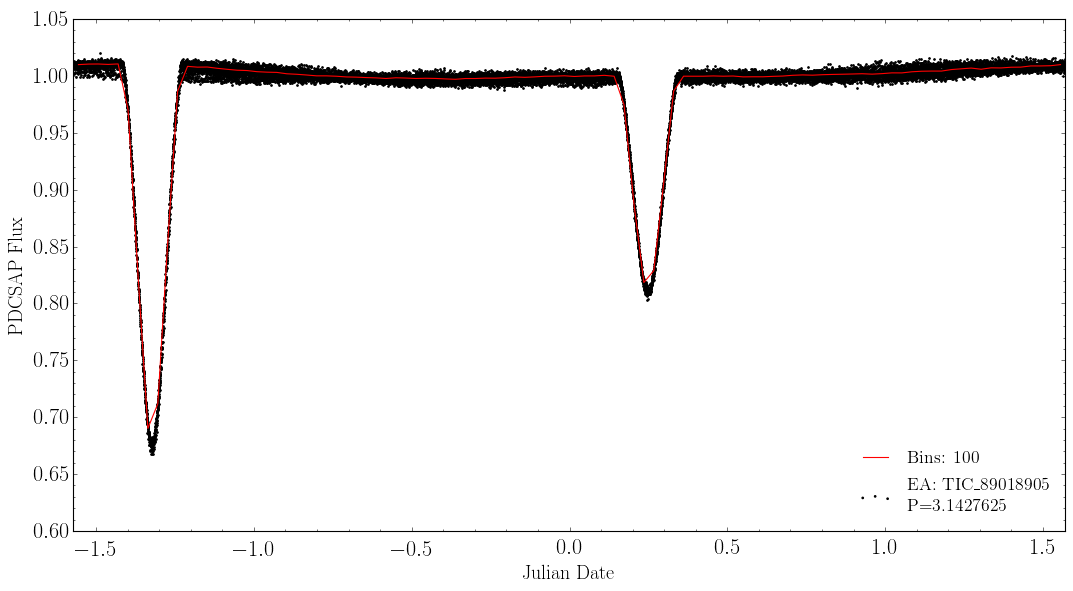

20 EB


/astro/users/jbirky/.local/lib/python3.6/site-packages/astropy/timeseries/io/kepler.py:77: UserWarning: Ignoring 815 rows with NaN times
  warnings.warn('Ignoring {0} rows with NaN times'.format(np.sum(nans)))


Stacking 1 light curve(s).


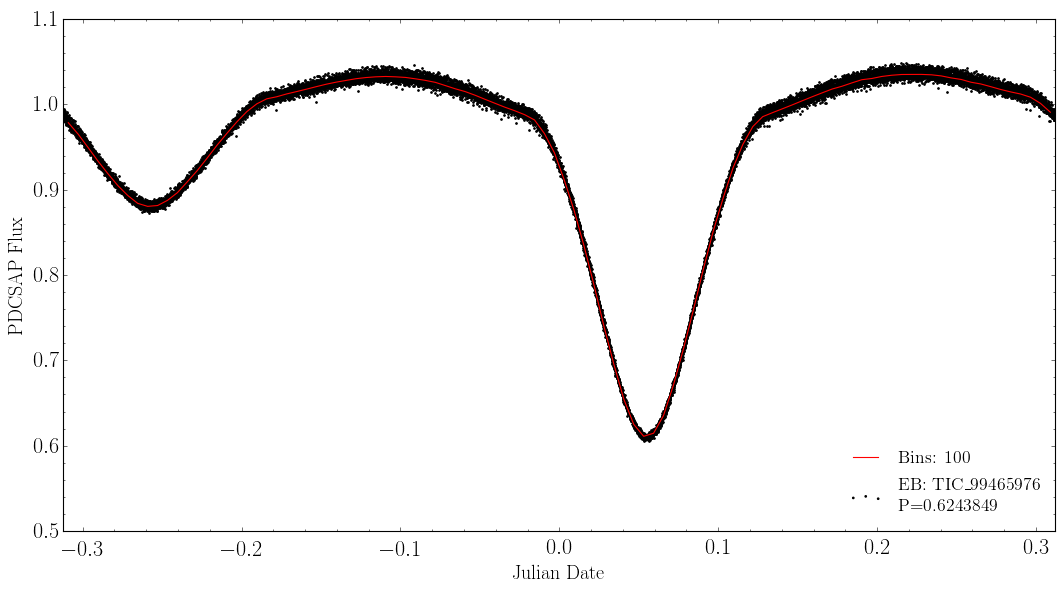

25 EB


/astro/users/jbirky/.local/lib/python3.6/site-packages/astropy/timeseries/io/kepler.py:77: UserWarning: Ignoring 815 rows with NaN times
  warnings.warn('Ignoring {0} rows with NaN times'.format(np.sum(nans)))


Stacking 1 light curve(s).


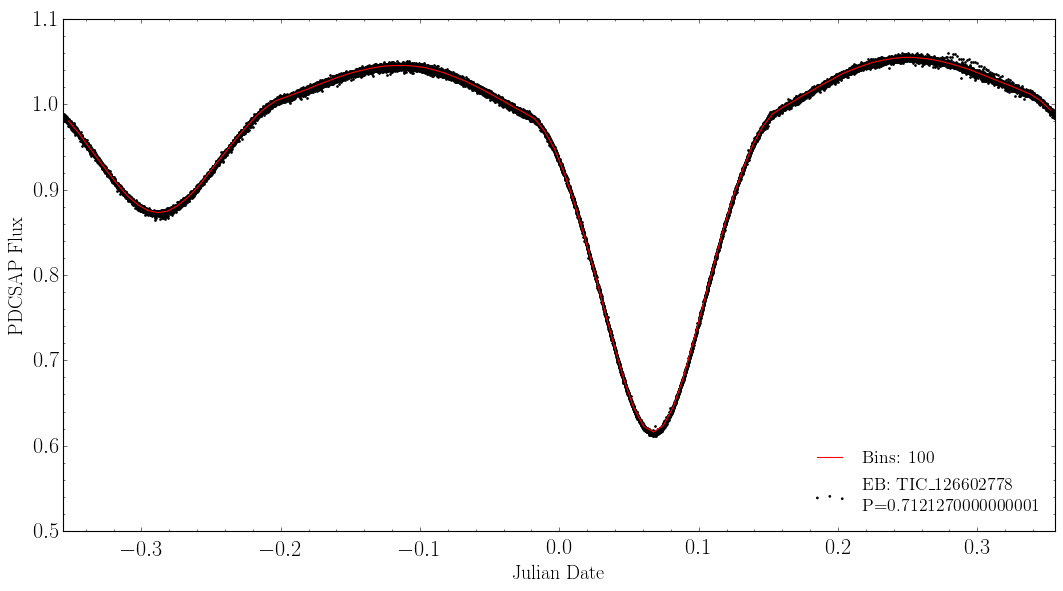

4 EW


/astro/users/jbirky/.local/lib/python3.6/site-packages/astropy/timeseries/io/kepler.py:77: UserWarning: Ignoring 815 rows with NaN times
  warnings.warn('Ignoring {0} rows with NaN times'.format(np.sum(nans)))


Stacking 1 light curve(s).


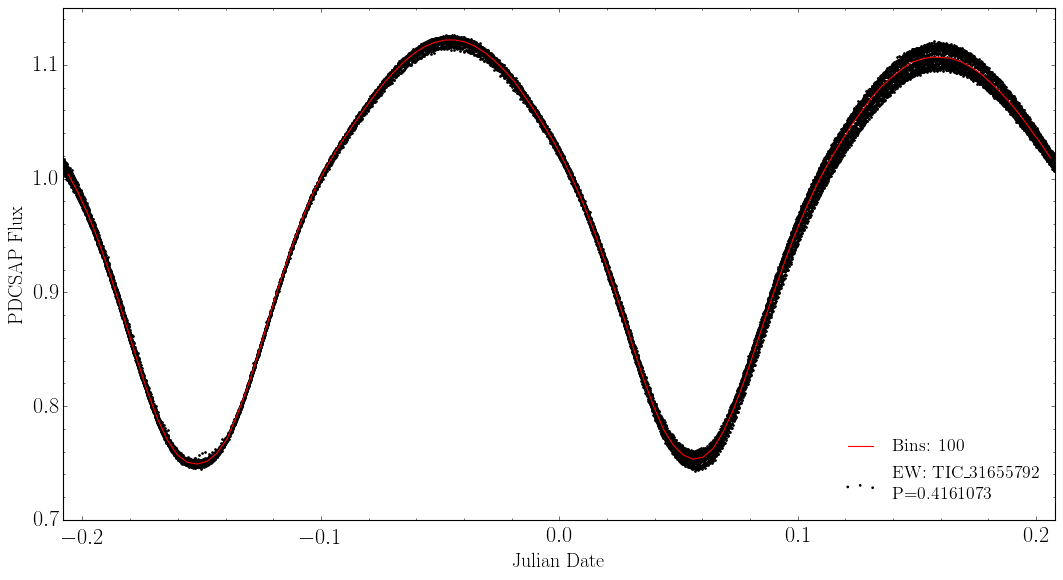

6 EW


/astro/users/jbirky/.local/lib/python3.6/site-packages/astropy/timeseries/io/kepler.py:77: UserWarning: Ignoring 815 rows with NaN times
  warnings.warn('Ignoring {0} rows with NaN times'.format(np.sum(nans)))


Stacking 1 light curve(s).


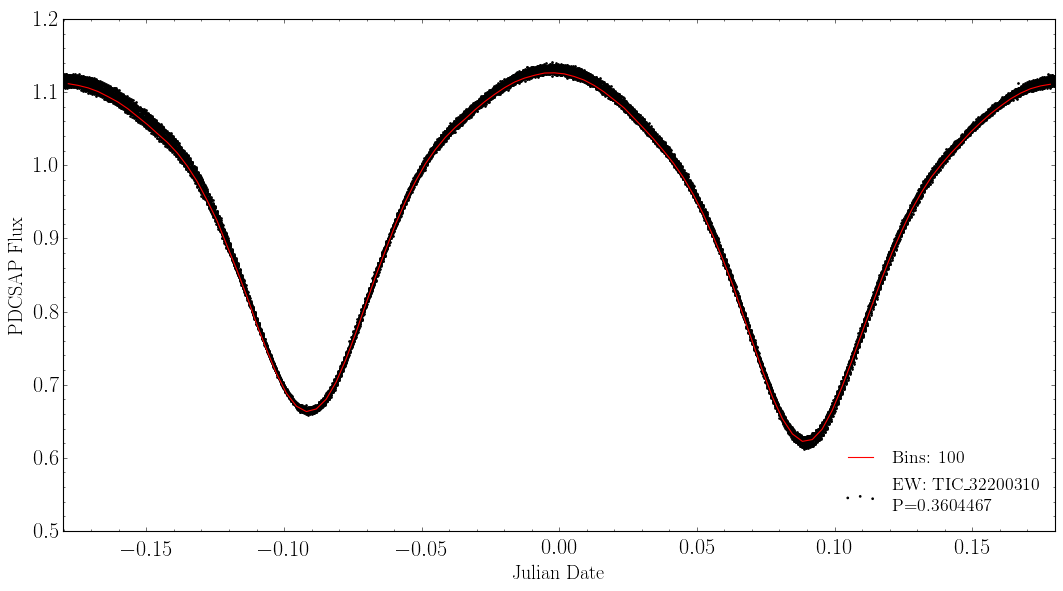

14 ROT


/astro/users/jbirky/.local/lib/python3.6/site-packages/astropy/timeseries/io/kepler.py:77: UserWarning: Ignoring 815 rows with NaN times
  warnings.warn('Ignoring {0} rows with NaN times'.format(np.sum(nans)))


Stacking 1 light curve(s).


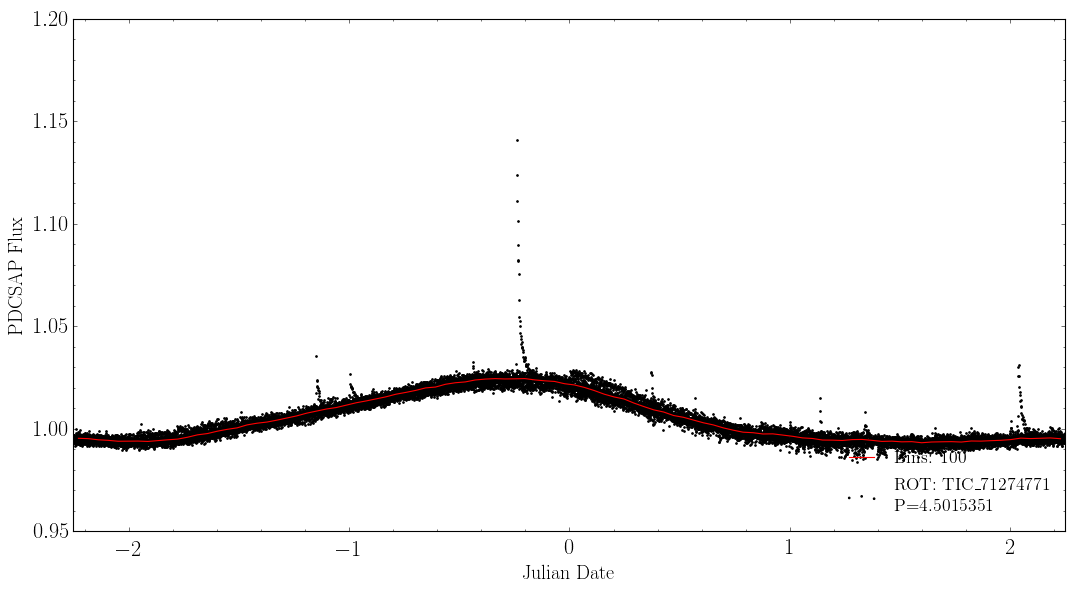

21 ROT


/astro/users/jbirky/.local/lib/python3.6/site-packages/astropy/timeseries/io/kepler.py:77: UserWarning: Ignoring 815 rows with NaN times
  warnings.warn('Ignoring {0} rows with NaN times'.format(np.sum(nans)))


Stacking 1 light curve(s).


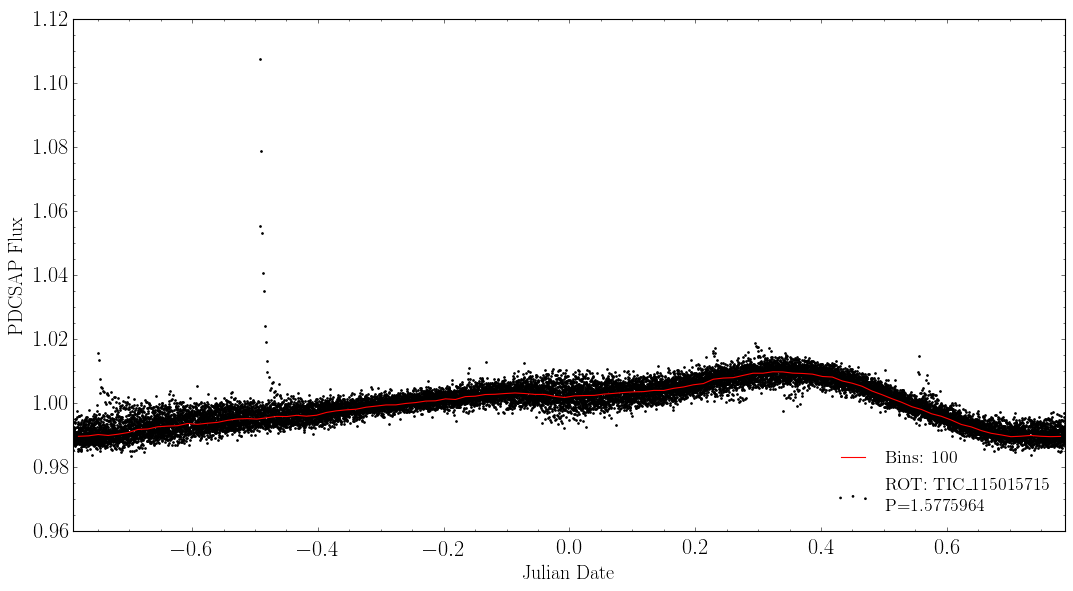

62 RRAB


/astro/users/jbirky/.local/lib/python3.6/site-packages/astropy/timeseries/io/kepler.py:77: UserWarning: Ignoring 815 rows with NaN times
  warnings.warn('Ignoring {0} rows with NaN times'.format(np.sum(nans)))


Stacking 1 light curve(s).


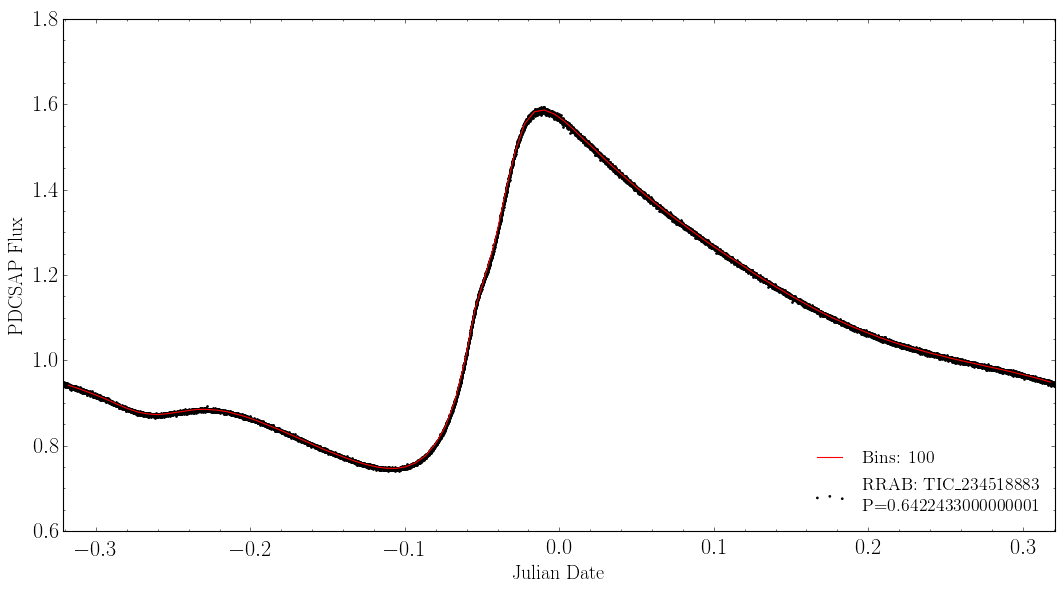

117 RRAB


/astro/users/jbirky/.local/lib/python3.6/site-packages/astropy/timeseries/io/kepler.py:77: UserWarning: Ignoring 815 rows with NaN times
  warnings.warn('Ignoring {0} rows with NaN times'.format(np.sum(nans)))


Stacking 1 light curve(s).


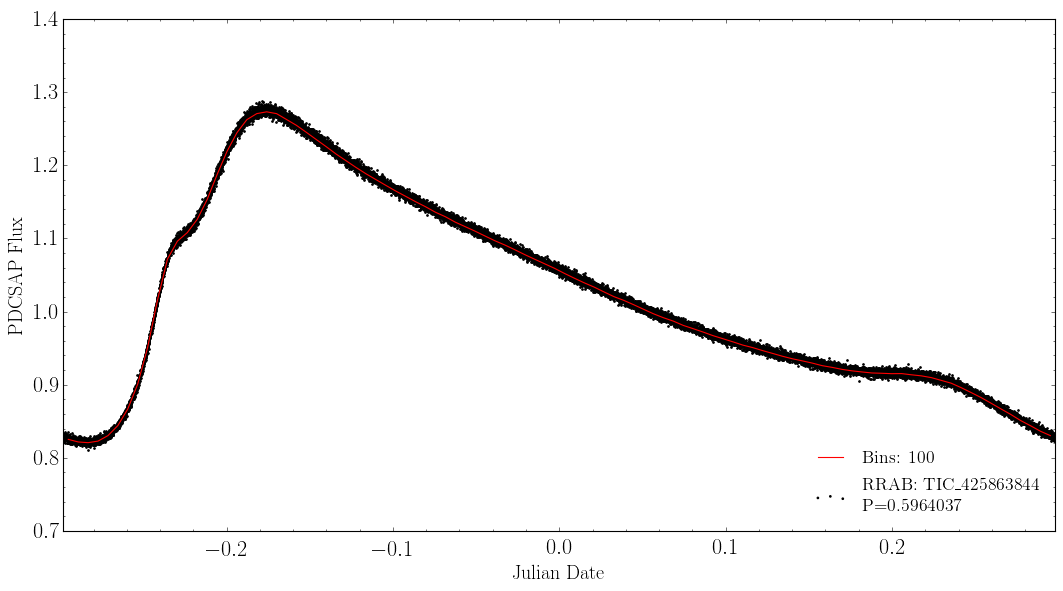

In [165]:
# Compute DTW between two examples
tsteps = 100
tarr = np.arange(0,tsteps,1)
farr = []
ids = []
periods = []
types = []

demo = [5,16, 20,25, 4,6, 14,21, 62,117]


for i in demo:
    tic_id = list(ref['tic_id'])[i]
    sec = list(ref['sector'])[i]
    typ = list(ref['Type'])[i]
    per = list(ref['period'])[i]
    print(i, typ)
    
    data_full = tb.readSourceFiles(tic_id, sector=sec)[0]
    
#     ts = data_full[~np.isnan(data_full['pdcsap_flux'])]
#     ls =  LombScargle(ts.time.jd, ts['pdcsap_flux'], dy=ts['pdcsap_flux_err'], \
#                       normalization='standard')
#     ls_freq, ls_power = ls.autopower(minimum_frequency=.001, \
#                           maximum_frequency=100, samples_per_peak=10)
#     ls_pwr_spec  = np.vstack([np.array(1/ls_freq), np.array(ls_power)])
#     ls_max_pwr = np.argmax(ls_pwr_spec, axis=1)[1]
#     per = ls_pwr_spec[0][ls_max_pwr]
    
    data = data_full.fold(period=per*u.day) 
#     plotLightCurve(data, label=f"{typ}: TIC_{tic_id}\nP={per}", save_dir=f'{tb.plot_dir}/dtw_ex_classes', tic_id=tic_id)

    tbins = np.linspace(min(data.time.jd), max(data.time.jd), tsteps+1)
    bin_width = (tbins[1] - tbins[0])/2
    bin_flux = []
    for i in range(tsteps):
        bin_ind = np.where((data.time.jd > tbins[i]) & (data.time.jd < tbins[i+1]))[0]
        bin_flux.append(np.nanmedian(data['pdcsap_flux'][bin_ind])/u.electron*u.second)
    bin_flux = np.array(bin_flux)/np.median(np.array(bin_flux))

    plt.figure(figsize=[16,8])
    plt.ticklabel_format(useOffset=False)
    plt.scatter(data.time.jd, data['pdcsap_flux']/np.nanmedian(data['pdcsap_flux']), \
             color='k', s=2, label=f"{typ}: TIC\_{tic_id}\nP={per}")
    plt.plot(tbins[:tsteps]+bin_width, bin_flux, color='r', label=f'Bins: {tsteps}')

    plt.ylabel('PDCSAP Flux', fontsize=18)
    plt.xlabel('Julian Date', fontsize=18)
    plt.xlim(min(data.time.jd), max(data.time.jd))
    plt.legend(loc='lower right', frameon=False, fontsize=16)
    plt.minorticks_on()
    plt.savefig(f'{tb.plot_dir}/dtw_ex_classes/TIC_{tic_id}.png')
    plt.show() 
    
    farr.append(bin_flux)
    ids.append(tic_id)
    periods.append(per)
    types.append(typ)